In [1]:
# Librerie
import os
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
get_ipython().magic('pylab inline')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Cartelle Input/Output
dir_df = os.path.join(os.path.abspath(''),'stg')
dir_out = os.path.join(os.path.abspath(''),'output')

In [3]:
df_g3_filename = r'df_g3.pkl'
df_g3_fullpath = os.path.join(dir_df, df_g3_filename)
df_g3 = pd.read_pickle(df_g3_fullpath)

In [4]:
df_g3.head(2)

,date,Speranza di vita alla nascita
0,2016,None
1,2015,83.490243902439


In [5]:
# Setto indice la Data
df_g3 = df_g3.set_index(['date'])

In [6]:
df_g3 = df_g3.dropna()

In [7]:
df_g3['Speranza di vita alla nascita'] = df_g3['Speranza di vita alla nascita'].astype(float)

In [8]:
df_g3 = df_g3.sort_index()

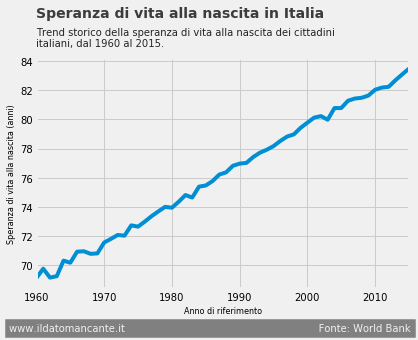

In [11]:
style.use('fivethirtyeight')
tp = df_g3.plot(kind='line',
               legend = False,
               figsize = (6,4))

tp.tick_params(axis = 'both', which = 'major', labelsize = 10)

tp.set_ylabel('Speranza di vita alla nascita (anni)',fontsize=8)
tp.set_xlabel('Anno di riferimento',fontsize=8)

text = tp.text(x = -4, y = 65.5,
    s = 'www.ildatomancante.it                                                              Fonte: World Bank',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

text.set_url('http://www.ildatomancante.it/opendata/popolazione/799/la-grande-fuga-salute-ricchezza-e-origini-della-disuguaglianza-in-italia/')

# Adding a title and a subtitle Reddito e aspettativa di vita
tp.text(x = 0, y = 87, s = "Speranza di vita alla nascita in Italia",
               fontsize = 14, weight = 'bold', alpha = .75)
tp.text(x = 0, y = 85, 
               s = "Trend storico della speranza di vita alla nascita dei cittadini \nitaliani, dal 1960 al 2015.",
              fontsize = 10, alpha = .85)

fig_posts = tp.get_figure()
fig_posts.tight_layout()
fig_posts.savefig(os.path.join(dir_out,'G3_Trend_Vita_Italia.png'), format='png', dpi=300,bbox_inches='tight')
fig_posts.savefig(os.path.join(dir_out,'G3_Trend_Vita_Italia.svg'), format='svg', dpi=300,bbox_inches='tight')

In [10]:
df_g3.to_csv(os.path.join(dir_out,r'G3_Trend_Vita_Italia.csv'),header=True, index=False)